### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


In [142]:
#input the dataset on Jupyter Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ds1 = 'Portfolio 1 - Resources/The E-commerce Dataset.csv'

In [143]:
df1 = pd.read_csv(ds1)

 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [144]:
# displaying table
print(df1)
df1.head()

       userId  timestamp                                    review  \
0        4051      12807                 Great job for what it is!   
1        4052     122899               Free Access Worth your Time   
2          33      12700             AOL..I love you!!!!!!!!!!!!     
3          33      21000              EBAY!!!  I LOVE YOU!!!! :-)*   
4          33      22300           Blair Witch...Oh Come On.......   
...       ...        ...                                       ...   
19995   10805      50600                 The Upper Class Fast Food   
19996   10806      82201             What more can you ask for????   
19997   10806      82201          Excellent steak for a good price   
19998   10807      31504                     Different story world   
19999   10808      10200  Boldly Displaying Sigourneys Cleavage ..   

                                                    item  rating  helpfulness  \
0                                                   eBay     5.0          2.0 

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [145]:
df1.isnull().sum().sum()
df1.isnull().sum()

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [1]:
df1_filtered = df1.dropna()
print(df1_filtered)

NameError: name 'df1' is not defined

In [148]:
df1_filtered_review = df1_filtered[df1_filtered["review"].str.lower() != "none"]
print("The length of the data after remove missing records of gender, rating and helpfulness and missing data of review :" , str(df1_filtered_review.shape))

The length of the data after remove missing records of gender, rating and helpfulness and missing data of review : (19916, 11)


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [126]:
# your code and solutions
# Q2.1 total number of unique users, unique reviews, unique items, and unique categories

x = (df1_filtered_review["userId"].nunique())
print("total unique users : " + str(x))

x = (df1_filtered_review["review"].nunique())
print("total unique reviews : " + str(x))

x = (df1_filtered_review["item"].nunique())
print("total unique items : " + str(x))

x = (df1_filtered_review["category"].nunique())
print("total unique categories : " + str(x))

total unique users : 8562
total unique reviews : 19459
total unique items : 89
total unique categories : 9


In [127]:
# Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
df1_filtered_review.rating.describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [128]:
#  Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
df1_filtered_review.groupby(['gender']).describe()

userId                                                         \
          count         mean          std  min     25%     50%     75%   
gender                                                                   
F        9793.0  5533.094149  3324.559586  0.0  2048.0  5909.0  8363.0   
M       10123.0  5465.210313  3363.293294  2.0  1934.0  5880.0  8423.0   

                timestamp                ... item_price        user_city  \
            max     count          mean  ...        75%    max     count   
gender                                   ...                               
F       10805.0    9793.0  59167.472378  ...      126.5  149.0    9793.0   
M       10808.0   10123.0  58824.663835  ...      126.5  149.0   10123.0   

                                                          
             mean        std  min  25%   50%   75%   max  
gender                                                    
F       19.361789  11.719459  0.0  9.0  19.0  30.0  39.0  
M       19.442952  11.537247  0.0  9.0  19.0  29.0  39.0  

[2 rows x 56 columns]

In [129]:
# Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
rating_item = df1_filtered_review.groupby("item").describe()["rating"]
rating_item.sort_values(by = "count", ascending = False)

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
AOL (America Online),939.0,2.500532,1.368528,1.0,1.0,2.0,4.0,5.0
All Advantage,657.0,3.412481,1.541706,1.0,2.0,4.0,5.0,5.0
eBay,596.0,4.333893,0.949618,1.0,4.0,5.0,5.0,5.0
McDonald's,415.0,2.698795,1.256240,1.0,2.0,3.0,4.0,5.0
NetZero,350.0,3.074286,1.360588,1.0,2.0,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
The Legend Of Zelda Ocarina Of Time for Nintendo 64,143.0,4.706294,0.729964,1.0,5.0,5.0,5.0,5.0
How the Grinch Stole Christmas,143.0,3.874126,1.260824,1.0,3.0,4.0,5.0,5.0
Applebee's,141.0,3.822695,1.272139,1.0,3.0,4.0,5.0,5.0


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

In [130]:
!pip install seaborn

In [131]:
import seaborn as sns

## Correlation between gender and rating
As shown in the graph below, both females and males are on the same proportion regarding to ratings gave for item purchased. These value ???

<Axes: xlabel='gender', ylabel='rating'>

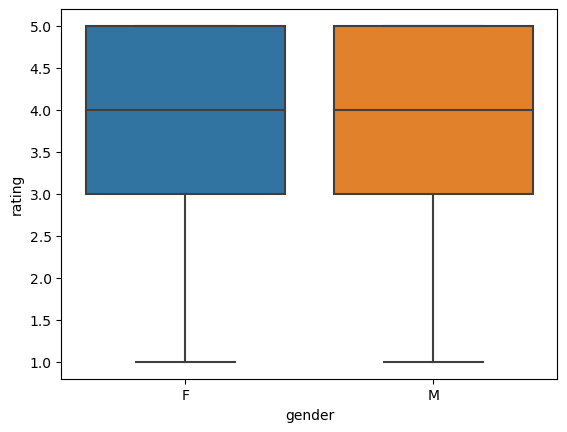

In [132]:
sns.boxplot(x = "gender", y = "rating", data = df1_filtered_review)

## Correlation between helpfulness and rating
The boxplot shown the helpfulness of the rating. From the scale 0.0 to 4.0, we can conclude that half of them were helped of the rating. ????


<Axes: xlabel='helpfulness', ylabel='rating'>

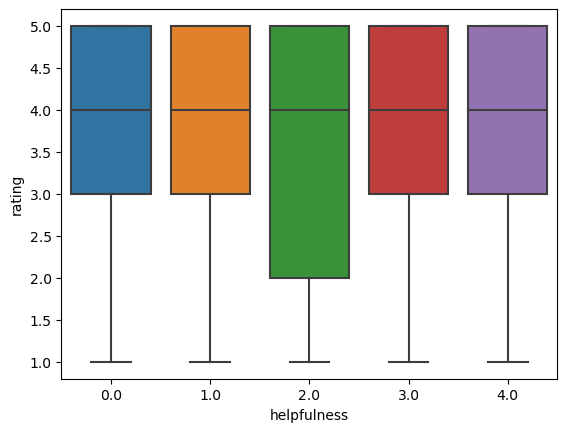

In [133]:
sns.boxplot(x = "helpfulness", y = "rating", data = df1_filtered_review)

## Correlation between rating and category


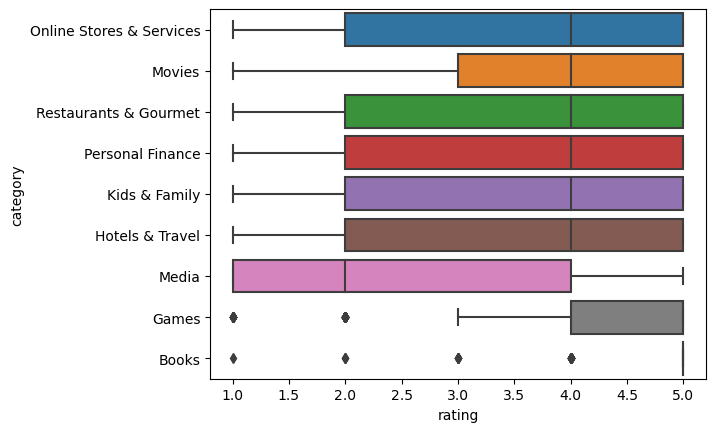

In [134]:
df1_filtered_review = sns.boxplot(x = "rating", y = "category", data = df1_filtered_review)

### Summary    

The dataset contain 20.000 data which in each row contain unique information from userId to user_city. After removing missing data and rows that do not have reviews, number of data decreased to 19.916 datas. Based on that numbers, i found 8.562 unique users, 19.459 unique reviews, 89 unique items and 9 unique categories. Further, i calculcate desriptive analytics of rating records and found that the average ratings around 3,7. As per gender calculation, it was shown that man tend to give more reviews than women.

Those 3 graphs above display the correlation between gender, helpfulness and category versus rating.
1. In terms of rating that was given by each gender, didn't show much differences. So, both females and males generally provides the same rating for the goods.
2. As for helpfullness and rating, most users were helped with the rating given to the products. Small part of users find ratings were not impacted to them.
3. Over 9 categories in data set, 7 of them has a wide range of rating. However the other two categories namely games and books has some outliers, where it didn't give clear visualization.

Overall the observations of rating and other variables did not give the users much significant impact, since the results shown in the boxplot were constant and quite similar between variables.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [149]:
df1_filtered_review.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [150]:
# 1. reviews of which the helpfulness is no more than 2
df1_helpfulness = df1_filtered_review.drop(df1_filtered_review.index[(df1_filtered_review["helpfulness"]<=2)])
print("number of helpfulness is no more than 2 : " + str(len(df1_helpfulness)))

number of helpfulness is no more than 2 : 13643


In [151]:
# 2. users who rate less than 7 items
# remove outliers by group userId and items
df1_user = df1_helpfulness.groupby("userId").count()["item"].reset_index(name = "count")
print(len(df1_user))

df1_user.head()

#finding users who rate less than 7 items
userId_less_7 = df1_user[df1_user["count"] >= 7]["userId"].tolist()
print(len(userId_less_7))

#filter the outliers
df1_helpfulness = df1_helpfulness[df1_helpfulness['userId'].isin(userId_less_7)]
print("number of users who rate less than 7 :" , len(df1_helpfulness))

6535
267
number of users who rate less than 7 : 2741


In [152]:
#3. items that receives less than 11 ratings
# remove outliers by group names
df1_user = df1_helpfulness.groupby("item").count()["rating"].reset_index(name = "count")
print(len(df1_user))

df1_user.head()

#finding items who that receives less than 11 ratings
item_less_11 = df1_user[df1_user["count"] >= 11]["item"].tolist()
print(len(item_less_11))

#filter the outliers
df1_helpfulness = df1_helpfulness[df1_helpfulness["item"].isin(item_less_11)]
print("number of items that receives less than 11 ratings :" , len(df1_helpfulness))

89
82
number of items that receives less than 11 ratings : 2685


In [153]:
df1_helpfulness.to_csv("The E-commerce Dataset_updated.csv", index=False)